In [1]:
import keras
import cv2
from collections import Counter
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import tensorflow as tf
import seaborn as sns

%matplotlib inline

In [2]:
d = {"белуга ликер": ["2_0_0.jpg", "2_0_1.jpg"], "ледофф синий": ["2_2_5.jpg", "2_2_6.jpg", "6_2_7.jpg", "6_2_8.jpg", "9_1_10.jpg", "9_1_11.jpg", "9_1_12.jpg", "9_1_16.jpg"], "ледофф белый": ["2_0_4.jpg", "2_2_7.jpg", "2_2_8.jpg", "2_2_9.jpg"], "деревенька конь¤к": ["2_0_5.jpg", "2_3_9.jpg"], "деревенька водка": ["2_0_6.jpg", "2_0_7.jpg", "2_3_12.jpg", "2_3_14.jpg"], "стужа": ["2_0_8.jpg", "2_0_9.jpg", "2_0_10.jpg", "2_0_11.jpg"], "газпром": ["2_0_12.jpg", "2_0_13.jpg"], "урожай": ["2_0_14.jpg", "2_0_15.jpg", "2_3_19.jpg", "2_3_21.jpg", "2_3_23.jpg", "6_1_14.jpg", "6_1_15.jpg"], "олень": ["2_0_16.jpg", "2_0_17.jpg", "2_0_18.jpg", "2_3_26.jpg", "2_3_28.jpg"], "березка": ["2_0_21.jpg", "2_0_22.jpg", "2_0_23.jpg"], "хаски": ["2_0_24.jpg", "2_0_25.jpg", "9_2_0.jpg", "9_2_1.jpg"], "п¤ть озер": ["2_0_27.jpg", "6_1_8.jpg", "6_1_9.jpg", "6_1_10.jpg", "6_1_11.jpg", "9_2_4.jpg", "9_2_5.jpg", "9_2_6.jpg", "9_2_7.jpg", "9_2_8.jpg", "9_2_9.jpg", "9_2_10.jpg"], "тундра бело син¤¤": ["2_1_2.jpg", "6_2_3.jpg", "9_1_4.jpg", "9_1_7.jpg"], "тундра бело зелена¤": ["2_1_4.jpg", "6_2_4.jpg", "6_2_5.jpg"], "тундра бело желта¤": ["2_1_6.jpg", "9_1_6.jpg"], "кизл¤р": ["2_1_11.jpg", "2_1_12.jpg"], "медна¤ лошадь": ["2_1_13.jpg", "2_1_14.jpg", "2_1_15.jpg", "2_1_23.jpg"], "бела¤ сова": ["2_1_16.jpg", "2_1_22.jpg"], "стара¤ казань": ["2_1_17.jpg"], "царь кедр темна¤": ["2_1_18.jpg", "2_3_15.jpg", "9_1_18.jpg"], "царь кедр светла¤": ["2_1_19.jpg", "2_3_13.jpg", "9_1_17.jpg"], "хлебна¤": ["2_1_20.jpg", "2_3_11.jpg", "6_1_17.jpg", "9_1_19.jpg"], "русска¤ валюта": ["2_1_21.jpg", "6_2_14.jpg", "6_2_15.jpg"], "хортиц¤": ["2_1_25.jpg", "2_1_26.jpg", "2_1_27.jpg", "2_1_28.jpg", "2_1_29.jpg"], "чача": ["2_2_2.jpg", "2_2_3.jpg", "2_2_4.jpg"], "ледофф красный": ["2_2_10.jpg", "2_2_11.jpg", "2_2_12.jpg", "2_2_13.jpg", "6_2_11.jpg", "6_2_12.jpg"], "беленька¤": ["2_2_14.jpg", "2_2_15.jpg", "2_2_16.jpg", "2_2_17.jpg", "2_2_18.jpg", "2_2_19.jpg", "2_2_20.jpg"], "чернослив": ["2_3_0.jpg", "2_3_1.jpg"], "клюква": ["2_3_2.jpg", "2_3_3.jpg", "2_3_4.jpg", "2_3_5.jpg", "2_3_6.jpg", "2_3_7.jpg", "2_3_8.jpg"], "серебр¤на¤ гора": ["2_3_17.jpg"], "русский север": ["2_3_29.jpg", "2_3_31.jpg"], "царь красный": ["2_3_34.jpg", "2_3_36.jpg"], "царь белый": ["2_3_37.jpg", "2_3_38.jpg"], "манчестер джин": ["2_4_0.jpg", "6_5_6.jpg"], "хуч": ["2_4_2.jpg", "2_4_3.jpg", "2_4_4.jpg"], "жигулевское 1978": ["2_4_5.jpg", "2_4_6.jpg"], "хайникен": ["2_4_7.jpg", "2_4_8.jpg"], "амстел": ["2_4_10.jpg", "2_4_11.jpg"], "крушовице светлое": ["2_4_12.jpg", "2_4_13.jpg"], "гессер": ["2_4_14.jpg", "2_4_15.jpg"], "охота крепкое": ["2_4_16.jpg"], "балтика 7": ["2_4_18.jpg", "2_4_19.jpg", "6_5_0.jpg", "6_5_1.jpg"], "талка": ["6_1_0.jpg", "6_1_1.jpg", "6_1_2.jpg"], "зелена¤ марка": ["6_1_3.jpg", "6_1_4.jpg", "6_1_5.jpg", "6_1_6.jpg", "6_1_7.jpg"], "путинка": ["6_1_12.jpg", "6_1_13.jpg"], "царска¤": ["6_2_2.jpg", "9_1_0.jpg", "9_1_1.jpg"], "ледофф лемон": ["6_2_9.jpg", "9_1_14.jpg"], "ледофф бело красный": ["6_2_10.jpg", "9_1_15.jpg"], "тельн¤жка": ["6_2_13.jpg", "6_3_21.jpg"], "фински": ["6_2_16.jpg", "6_2_17.jpg"], "пчелка": ["6_3_0.jpg", "6_3_1.jpg"], "топаз": ["6_3_13.jpg", "6_3_14.jpg"], "скотч терьер": ["9_0_13.jpg", "9_0_14.jpg"], "тундра бела¤": ["9_1_5.jpg", "9_1_8.jpg"], "сибитер": ["9_2_2.jpg", "9_2_3.jpg"]}

In [3]:
net = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet", input_shape=(100,100,3,))
net.trainable = False

In [4]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
def get_colors(image, color_count):
    
    color_sensitivity = 255 / color_count ** (1. / 3.)
    modified_image = image - image % int(color_sensitivity)
    
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    return Counter(list(map(tuple, modified_image)))

In [6]:
def colours_pipeline(d):
    X = []
    for dd in d:
        X.extend(d[dd])

    X = [os.path.join('detected\\train', x) for x in X]
    X = [get_image(x) for x in X]

    data = pd.DataFrame()
    for image in X:
        data = data.append(get_colors(image, 150), ignore_index=True).fillna(0)
    data = normalize(data)

    y = []
    for dd in d:
        y.extend([dd]*len(d[dd]))
        
    return data, y

In [7]:
def vect_pipeline(d):
    X = []
    for dd in d:
        X.extend(d[dd])

    X = [os.path.join('detected\\train', x) for x in X]
    X = [get_image(x) for x in X]
    X = np.array([cv2.resize(x, (100,100)) for x in X])

    features = net.predict(X)
    features = features.reshape(features.shape[0], features.shape[1]*features.shape[2]*features.shape[3])

    y = []
    for dd in d:
        y.extend([dd]*len(d[dd]))

    return features, y

In [8]:
colors, y = colours_pipeline(d)
vect, _ = vect_pipeline(d)

In [9]:
colors_scores = cross_val_score(KNeighborsClassifier(metric='cosine', n_neighbors=2), colors, y, cv=10)
print(f'Colors accuracy:\t{colors_scores.mean()}')

Colors accuracy:	0.40490196078431373


C:\Users\vorot\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [10]:
vect_scores = cross_val_score(KNeighborsClassifier(metric='cosine', n_neighbors=2), vect, y, cv=10)
print(f'Vector accuracy:\t{vect_scores.mean()}')

C:\Users\vorot\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Vector accuracy:	0.5343137254901961


<AxesSubplot:>

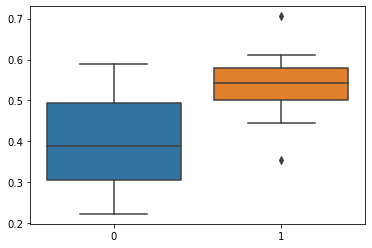

In [11]:
sns.boxplot(data=[colors_scores, vect_scores])